<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.RwandaCO2Emissions/blob/data_preparation_baseline/2_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive

# Datasets
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Data management
from sklearn.model_selection import train_test_split

# Other
import os

# Setup

In [2]:
# %%capture
GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'
FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]
GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 1
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/' # e.g. GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/'
# --------------------------------------------------
try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8
# ---------------------------------------
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}
url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)
# ---------------------------------------
import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model
def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)
MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)
# ---------------------------------------
from path_manager import PathManager
from model import Model
from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions
from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer
# ---------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')
manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

a
--2023-09-28 15:35:59--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/path_manager.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3482 (3.4K) [text/plain]
Saving to: ‘path_manager.py’

path_manager.py     100%[===================>]   3.40K  --.-KB/s    in 0s      

2023-09-28 15:35:59 (30.0 MB/s) - ‘path_manager.py’ saved [3482/3482]

--2023-09-28 15:35:59--  http://path_manager.py/
Resolving path_manager.py (path_manager.py)... failed: Name or service not known.
wget: unable to resolve host address ‘path_manager.py’
FINISHED --2023-09-28 15:35:59--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.4K in 0s (30.0 MB/s)
--2023-09-28 15:35:59--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/sklearn_transformers.py
Re

# Download the data

In [3]:
df_train = pd.read_csv(manager.train_path)

In [4]:
df_submission = pd.read_csv(manager.test_path)

In [5]:
assert len(df_train.columns) == len(df_submission.columns) + 1
assert set(df_train.columns) - set(df_submission.columns) == {'emission'}

# Split the data

- We split available, labeled training data into **trainval** and **test set**

In [6]:
TRAINVAL_PERCENT = 0.85
TRAIN_PERCENT = 0.8
RANDOM_STATE = 42
TARGET_COLUMN = 'emission'

df_trainval, df_test = train_test_split(
    df_train,
    train_size=TRAINVAL_PERCENT,
    random_state=RANDOM_STATE
)

df_train, df_val = train_test_split(
    df_trainval,
    train_size=TRAIN_PERCENT,
    random_state=RANDOM_STATE
)

df_train.shape, df_val.shape, df_test.shape

((53735, 76), (13434, 76), (11854, 76))

## Make sure train, validation and test are from the same distribution

# Not implemented, the code takes forever, big datasets

# Process the data

## Cleaning NAN columns

In [11]:
NAN_THRESHOLD = 18

res = nan_statistics(df_train)
nan_cols = [col for col in res.keys() if res[col] >= NAN_THRESHOLD]
nan_cols

Col -- Nan percentage
UvAerosolLayerHeight_aerosol_height 99.43612170838374
UvAerosolLayerHeight_aerosol_pressure 99.43612170838374
UvAerosolLayerHeight_aerosol_optical_depth 99.43612170838374
UvAerosolLayerHeight_sensor_zenith_angle 99.43612170838374
UvAerosolLayerHeight_sensor_azimuth_angle 99.43612170838374
UvAerosolLayerHeight_solar_azimuth_angle 99.43612170838374
UvAerosolLayerHeight_solar_zenith_angle 99.43612170838374
NitrogenDioxide_NO2_column_number_density 23.23997394621755
NitrogenDioxide_tropospheric_NO2_column_number_density 23.23997394621755
NitrogenDioxide_stratospheric_NO2_column_number_density 23.23997394621755
NitrogenDioxide_NO2_slant_column_number_density 23.23997394621755
NitrogenDioxide_tropopause_pressure 23.23997394621755
NitrogenDioxide_absorbing_aerosol_index 23.23997394621755
NitrogenDioxide_cloud_fraction 23.23997394621755
NitrogenDioxide_sensor_altitude 23.23997394621755
NitrogenDioxide_sensor_azimuth_angle 23.23997394621755
NitrogenDioxide_sensor_zenith_an

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle',
 'UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 

In [14]:
def remove_cols(df, cols):
    return df.drop(columns=cols)

df_train = remove_cols(df_train, nan_cols)
df_val = remove_cols(df_val, nan_cols)
df_test = remove_cols(df_test, nan_cols)
df_submission = remove_cols(df_submission, nan_cols)

In [21]:
assert \
    set(df_train.columns) - set(df_submission) == {TARGET_COLUMN} and \
    set(df_train) == set(df_val) == set(df_test)

## Clean outliers in target feature (row-wise)

In [28]:
df_train['emission'].describe()

count    53735.000000
mean        81.751192
std        144.095447
min          0.000000
25%          9.688742
50%         45.482280
75%        109.397098
max       3167.768000
Name: emission, dtype: float64

0.057709128128780124
count    50634.000000
mean        60.645843
std         61.284971
min          0.000000
25%          7.936085
50%         40.785533
75%         97.942678
max        249.980670
Name: emission, dtype: float64


<Axes: >

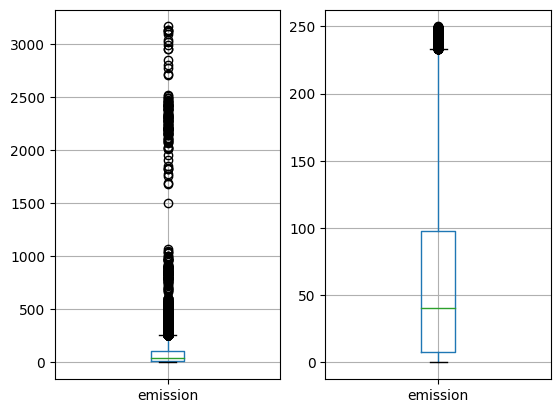

In [42]:
TARGET_OUTLIER_THRESHOLD = 250

print(
    df_train.loc[df_train[TARGET_COLUMN] >= TARGET_OUTLIER_THRESHOLD].shape[0] /
    df_train.shape[0]
)

print(
    df_train.loc[
        df_train[TARGET_COLUMN] < TARGET_OUTLIER_THRESHOLD
    ][TARGET_COLUMN].describe()
)

_, ax = plt.subplots(1, 2)
df_train[[TARGET_COLUMN]].boxplot(ax=ax[0])
df_train.loc[
    df_train[TARGET_COLUMN] < TARGET_OUTLIER_THRESHOLD,
    :
][[TARGET_COLUMN]].boxplot(ax=ax[1])

In [43]:
def clean_outlier(df, val):
    print(f'Shape before: {df.shape}')
    df = df.loc[
        df[TARGET_COLUMN] <= val,
        :
    ]
    print(f'Shape after: {df.shape}')
    return df

df_train = clean_outlier(df_train, TARGET_OUTLIER_THRESHOLD)
df_val = clean_outlier(df_val, TARGET_OUTLIER_THRESHOLD)
df_test = clean_outlier(df_test, TARGET_OUTLIER_THRESHOLD)

# df_submission does not have TARGET_COLUMN

Shape before: (53735, 48)
Shape after: (50634, 48)
Shape before: (13434, 48)
Shape after: (12611, 48)
Shape before: (11854, 48)
Shape after: (11160, 48)
